## Neural Networks

### Table of contents


- Generating Data
- Data Preparation
- Neural Networks from Scratch
- Neural Networks using Sklearn
- Model Training 
- Model Evaluation
- Hyperparameter Tuning


![alt text](https://adatis.co.uk/wp-content/uploads/ANN-Graph.gif)

### Generating Data <a id="data"></a>

In [0]:
import numpy as np
np.random.seed(123)

# XOR dataset
n_samples = 1000
mu, sigma = 2, 3
X = sigma * np.random.randn(n_samples, 2) + mu
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1000, 2)
y shape: (1000,)


In [0]:
print(X[:10])
y[:10]

[[-1.25689181  4.99203634]
 [ 2.84893549 -2.51888414]
 [ 0.26419924  6.95430961]
 [-5.28003773  0.71326211]
 [ 5.79780878 -0.60022121]
 [-0.03665845  1.71587309]
 [ 6.47416888  0.08329401]
 [ 0.66805412  0.69694617]
 [ 8.61779025  8.56035827]
 [ 5.01216169  3.1585592 ]]


array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

 Plotting the data.

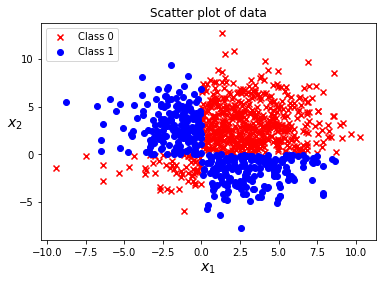

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[y == 0, 0], X[y == 0, 1], c= 'r', marker= 'x', label= 'Class 0') 
plt.scatter(X[y == 1, 0], X[y == 1, 1], c= 'b', marker= 'o', label= 'Class 1') 
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", rotation=0, fontsize=14)
plt.title('Scatter plot of data')
plt.legend(loc="upper left")
plt.show()

### Data Preparation <a id="data_prep"></a>

Splitting the data in a stratified fashion into training set with 80% of the samples and test set with the remaining 20%.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                     test_size= 0.2, 
                     stratify= y,
                     random_state= 123)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (800, 2)
X_test shape: (200, 2)


Transforming features by scaling each feature to the range of [0, 1].

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))


### Neural Networks from Scratch <a id="NN_scratch"></a>

Implementing a two layer neural network from scratch.

In [0]:
class Neural_Network:
    def __init__(self, n_x = 2, n_h = 3, n_y = 1, lr= 0.01, num_iter= 100):    
        self.W1 = np.random.randn(n_h, n_x) 
        self.b1 = np.random.randn(n_h, 1)
        self.W2 = np.random.randn(n_y, n_h)
        self.b2 = np.random.randn(n_y, 1)
        self.output = np.zeros((n_y, 1))
        self.lr = lr
        self.num_iter = num_iter
        
    def sigmoid(self, t):
        return 1/(1+np.exp(-t))

    def sigmoid_derivative(self, t):
        return self.sigmoid(t)*(1 - self.sigmoid(t))    
    
    def feedforward(self, X):
        
        self.Z1 = np.dot(self.W1, X.T) + self.b1   
        self.A1 = self.sigmoid(self.Z1)   
                
        self.Z2 = np.dot(self.W2, self.A1) + self.b2       
        self.A2 = self.sigmoid(self.Z2)  
        
        return self.A2
    
    def backpropagation(self, X, y):
        
        N = X.shape[0] # Number of examples

        dZ2 = self.A2 - y.T   #(1,1000) - (1,1) = (1,1000)
        
        self.dW2 = (1/N) * np.dot(dZ2, self.A1.T) #(1,1000)*(1000,3) =(1,3)
        
        self.db2 = (1/N) * np.sum(dZ2, axis =1, keepdims = True)
        
        dZ1 = np.dot(self.W2.T, dZ2)*self.sigmoid_derivative(self.A1)  
        
        self.dW1 = (1/N) * np.dot(dZ1, X) # (3,1000)*(1000,2)
        self.db1 = (1/N) * np.sum(dZ1, axis =1, keepdims = True)


    def update_parameters(self):
        self.W1 -= self.lr * self.dW1
        self.b1 -= self.lr * self.db1
        self.W2 -= self.lr * self.dW2
        self.b2 -= self.lr * self.db2
                
    
    # Define the cross entropy loss
    def loss(self, y, y_hat):
        return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
    
    
    def fit(self, X, y):
        
        loss_history = []
        for iter in range(self.num_iter):
            
            y_hat = self.feedforward(X)
            
            loss_history.append(self.loss(y, y_hat))
            
            self.backpropagation(X, y)
            
            self.update_parameters() 
            
        return loss_history  
            
    # Calculate probability estimates
    def predict_prob(self, X):
        return self.feedforward(X)
    
    # Predict class labels for samples in X
    def predict(self, X):
        return self.predict_prob(X).round() 
        # sigmoid(linearCombination) [x1,x2]->[c]
        # softmax(linearCombination) [x1,x2]->[r,b] where r+b=1
        # lcR,lcB 
        # r = softmax(lcR) = exp(lcR)/(exp(lcR) + exp(lcB))
        # b = softmax(lcB) = exp(lcB)/(exp(lcR) + exp(lcB))
        # prediction argmax([r,b])
        # ex: r= 0.6, b=0.4 then argmax([r,b]) = 0

Accuracy over test set: 0.74


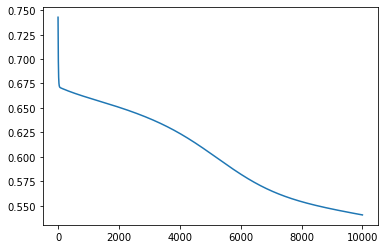

In [0]:
# Create an instance of the above class
lr = Neural_Network(n_x = 2, n_h = 3, n_y = 1, lr= 0.1, num_iter= 10000)


# Fit the model over training set
J = lr.fit(X_train, y_train)

plt.plot(J)
# Make predictions over test set

y_test_pred = lr.predict(X_test)

# Measure accuracy over test set
accuracy = (y_test_pred == y_test).mean()
print('Accuracy over test set:', accuracy)

### Neural Networks using SKlearn <a id="NN_sklearn"></a>

#### Model Training

In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

# Fit the data
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Model Evaluation

Plotting loss over training iterations. 

In [0]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import sys
print(sys.version)

The scikit-learn version is 0.22.1.
3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


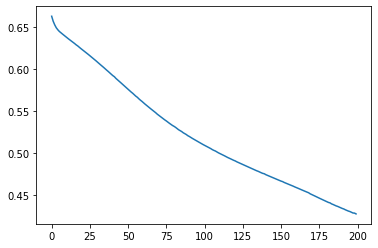

In [0]:
plt.plot(mlp.loss_curve_)

In [0]:
mlp.loss

'log_loss'

In [0]:
mlp.loss_

0.42718609268529584

In [0]:
mlp.loss_curve_[-1]

0.42718609268529584

&#x270d; Measure classification accuracy over the training/test sets.

In [0]:
from sklearn.metrics import accuracy_score

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

print("Training Accuracy: {0:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Testing Accuracy: {0:.2f}".format(accuracy_score(y_test, y_test_pred)))

Training Accuracy: 0.82
Testing Accuracy: 0.82


 Building a text report showing the main classification metrics including precision, recall, f1-score, and accuracy.

In [0]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       125
           1       0.77      0.73      0.75        75

    accuracy                           0.82       200
   macro avg       0.81      0.80      0.81       200
weighted avg       0.82      0.82      0.82       200



Computing and plotting confusion matrix.

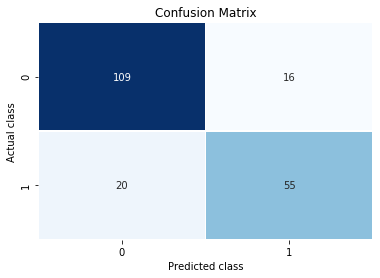

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(6,4))

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion Matrix");

#### Hyper-parameters Tuning

 Using GridSearchCV and finding the best estimator.

In [0]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [(10,), (50,), (10, 10)],
             'activation': ['tanh', 'relu'],
             'learning_rate': ['constant', 'adaptive'],
             'max_iter': [500],
              'random_state': [123]}

mlp = MLPClassifier()
gs = GridSearchCV(mlp, param_grid, cv = 5, verbose= 1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   51.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['

Best obtained parameters

In [0]:
print("The best parameters are:\n%s" % (gs.best_params_)) 

The best parameters are:
{'activation': 'relu', 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 123}


In [0]:
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

print("Training Accuracy: {0:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Testing Accuracy: {0:.2f}".format(accuracy_score(y_test, y_test_pred)))

Training Accuracy: 0.93
Testing Accuracy: 0.93
